In [68]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 400
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
! pip install plotly

     |████████████████████████████████| 7.2MB 5.4MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=8649eb85bc59aa7714fb9931d74cc23db6436dbee15d3d827a95a46380310fb2
  Stored in directory: /Users/ekselan/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [244]:
import plotly.express as px

In [ ]:
''' 
Process here involves loading in data from fantasypros.com for FLEX position,
split into RB, WR and TE subsets, cleaned and merged back together for use
in model. Model flow includes a random forest, logistic regression CV, and 
then cross-validation applied to a random forest.
'''


In [2]:
# Projections can be downloaded from fantasypros.com here:
# https://www.fantasypros.com/nfl/projections/rb.php?week=draft

df = pd.read_csv('/Users/ekselan/Documents/GitHub/DS-Unit-2-Applied-Modeling/data/FF_Build/FP_FF_Projs_FLEX_2019.csv')
print(df.shape)
df.head()

(491, 11)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS
0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6
2,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6
3,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3
4,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5


In [18]:
# Drop nan values
df = df.dropna()


(488, 11)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS
1,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6
2,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6
3,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3
4,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5
5,Julio Jones,ATL,WR1,1.5,9.4,0.0,105.8,"1,525.8",8.9,0.3,312.0


# RBs Subset

In [23]:
# Creat subset that just includes RB projections

rb_projs = df[df['POS'].str.contains('RB')]
print(rb_projs.shape)
rb_projs

(148, 11)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS
1,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6
2,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6
3,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3
4,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5
10,Le'Veon Bell,NYJ,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1
...,...,...,...,...,...,...,...,...,...,...,...
475,Chandler Cox,MIA,RB144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476,Marcus Murphy,CAR,RB145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
480,Cullen Gillaspia,HOU,RB146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,Khalfani Muhammad,DEN,RB147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Import RB points scored

In [10]:
# Import RB actual points

# Fantasy point totals can be downloaded from fantasypros.com here:
# https://www.fantasypros.com/nfl/reports/leaders/ppr-rb.php?year=2019&start=1&end=17

rb_points = pd.read_csv('/Users/ekselan/Documents/GitHub/DS-Unit-2-Applied-Modeling/data/FF_Build/FP_FF_Points_Scored_RB_2019.csv')
print(rb_points.shape)
rb_points.head()

(192, 6)


,Rank,Player,Team,Points,Games,Avg
0,1.0,Christian McCaffrey,CAR,471.2,16.0,29.5
1,2.0,Aaron Jones,GB,314.8,16.0,19.7
2,3.0,Ezekiel Elliott,DAL,311.7,16.0,19.5
3,4.0,Austin Ekeler,LAC,309.0,16.0,19.3
4,5.0,Derrick Henry,TEN,294.6,15.0,19.6


In [22]:
# Drop nan values for rb points

rb_points = rb_points.dropna()
print(rb_points.shape)
rb_points.head()

(190, 6)


,Rank,Player,Team,Points,Games,Avg
0,1.0,Christian McCaffrey,CAR,471.2,16.0,29.5
1,2.0,Aaron Jones,GB,314.8,16.0,19.7
2,3.0,Ezekiel Elliott,DAL,311.7,16.0,19.5
3,4.0,Austin Ekeler,LAC,309.0,16.0,19.3
4,5.0,Derrick Henry,TEN,294.6,15.0,19.6


In [31]:
# Make sure we're not looking at players that scored 0 points

rb_points = rb_points[rb_points['Points'] >= 0.1]
print(rb_points.shape)
rb_points

(152, 6)


,Rank,Player,Team,Points,Games,Avg
0,1.0,Christian McCaffrey,CAR,471.2,16.0,29.5
1,2.0,Aaron Jones,GB,314.8,16.0,19.7
2,3.0,Ezekiel Elliott,DAL,311.7,16.0,19.5
3,4.0,Austin Ekeler,LAC,309.0,16.0,19.3
4,5.0,Derrick Henry,TEN,294.6,15.0,19.6
...,...,...,...,...,...,...
147,148.0,Ryan Nall,CHI,0.8,8.0,0.1
148,149.0,Tony Brooks-James,MIN,0.7,3.0,0.2
149,150.0,De'Lance Turner,MIA,0.6,9.0,0.1
150,151.0,Alfred Morris,FA,0.4,1.0,0.4


### Merge RB projections with points scored

In [33]:
rbs = rb_projs.merge(rb_points, on='Player', how='outer')
print(rbs.shape)
rbs

(177, 16)


,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg
0,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,NYG,244.1,13.0,18.8
1,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,CAR,471.2,16.0,29.5
2,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,NO,248.5,14.0,17.8
3,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,DAL,311.7,16.0,19.5
4,Le'Veon Bell,NYJ,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,NYJ,215.0,15.0,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Zach Zenner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.0,FA,3.7,6.0,0.6
173,Jay Ajayi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0,FA,3.0,4.0,0.8
174,Ryan Nall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.0,CHI,0.8,8.0,0.1
175,Tony Brooks-James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,MIN,0.7,3.0,0.2


In [ ]:
# Cleaned up the "rbs" column a bit by removing nan values - there were 
# 8 observations (Devonta Freeman, Josh Jacobs, Carlos Hyde, DeAndre Washington,
#                 LeSean McCoy, Frank Gore, Chris Thompson, Jalen Richard)
# where the projections did not pull in, but I only need to keep Freeman and Jacobs
# (the other players had high ADPs already, and I am particularly interested in 
# players with low ADPs, i.e. earlier rounds)

In [55]:
# I'll need to manually fill the values for Freeman and Jacobs,
# so I'll use a dictionary for each

i = {'Team_x':'LV',
     'POS':'RB',
     'ATT':214,
     'YDS':938.7,
     'TDS':6.5,
     'REC':42.3,
     'YDS.1':50,
     'TDS.1':0,
     'FL':1,
     'FPTS':174.8
}

ii = {'Team_x':'ATL',
     'POS':'RB',
     'ATT':202.9,
     'YDS':874,
     'TDS':6.9,
     'REC':41.5,
     'YDS.1':50,
     'TDS.1':0,
     'FL':1,
     'FPTS':170.2
}


In [56]:
#Fill values with dictionary

rbs.loc[rbs['Player'] == 'Josh Jacobs'] = rbs.loc[rbs['Player'] == 'Josh Jacobs'].fillna(i)
rbs.loc[rbs['Player'] == 'Devonta Freeman'] = rbs.loc[rbs['Player'] == 'Devonta Freeman'].fillna(ii)


In [64]:
# Now I can drop all remaining nan values with the confidence that I am
# retaining all of my fantasy relevant players

rbs_cleaned = rbs.dropna()
print(rbs_cleaned.shape)
rbs_cleaned

(125, 16)


,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg
0,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,NYG,244.1,13.0,18.8
1,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,CAR,471.2,16.0,29.5
2,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,NO,248.5,14.0,17.8
3,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,DAL,311.7,16.0,19.5
4,Le'Veon Bell,NYJ,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,NYJ,215.0,15.0,14.3
5,David Johnson,HOU,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,HOU,141.5,13.0,10.9
6,Dalvin Cook,MIN,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,MIN,292.4,14.0,20.9
7,James Conner,PIT,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,PIT,145.5,10.0,14.6
8,Todd Gurley,ATL,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,ATL,219.4,15.0,14.6
9,Joe Mixon,CIN,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,CIN,225.4,16.0,14.1


In [65]:
rbs_cleaned.isnull().sum()

Player    0
Team_x    0
POS       0
ATT       0
YDS       0
TDS       0
REC       0
YDS.1     0
TDS.1     0
FL        0
FPTS      0
Rank      0
Team_y    0
Points    0
Games     0
Avg       0
dtype: int64

### Add RB ADP data

In [69]:
# Now I'll bring in the ADP data for RBS

# Average draft position data can be downloaded from fantasypros.com
# here: https://www.fantasypros.com/nfl/adp/rb.php?year=2019

rb_adp = pd.read_csv('/Users/ekselan/Documents/GitHub/DS-Unit-2-Applied-Modeling/data/FF_Build/FP_FF_ADP_RB_2019.csv')
print(rb_adp.shape)
rb_adp

(258, 12)


,RB,Overall,Player,Team,Bye,ESPN,MFL,FFC,RTSports,NFL,Fantrax,AVG
0,1.0,1.0,Saquon Barkley,NYG,11.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,Christian McCaffrey,CAR,7.0,2.0,3.0,3.0,2.0,3.0,2.0,2.5
2,3.0,3.0,Alvin Kamara,NO,9.0,3.0,2.0,2.0,3.0,2.0,3.0,2.5
3,4.0,4.0,Ezekiel Elliott,DAL,8.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5.0,6.0,David Johnson,HOU,10.0,5.0,5.0,5.0,6.0,6.0,5.0,5.3
5,6.0,7.0,Le'Veon Bell,NYJ,4.0,6.0,7.0,7.0,5.0,5.0,6.0,6.0
6,7.0,9.0,James Conner,PIT,7.0,8.0,6.0,6.0,7.0,8.0,7.0,7.0
7,8.0,17.0,Nick Chubb,CLE,7.0,11.0,10.0,8.0,8.0,10.0,10.0,9.5
8,9.0,19.0,Joe Mixon,CIN,9.0,9.0,11.0,11.0,11.0,9.0,9.0,10.0
9,10.0,18.0,Dalvin Cook,MIN,12.0,10.0,9.0,9.0,10.0,12.0,11.0,10.2


### Cleaning

In [71]:
# There are certainly some nans to address, but first I want to remove
# unnecessary columns
rb_adp = rb_adp.drop(['RB','Team','Bye','ESPN','MFL','FFC','RTSports','NFL','Fantrax'], axis=1)

# Now I'll change the "AVG" column name to "pos_adp" (positional adp),
# which helps clarify it from the "overall" adp
rb_adp = rb_adp.rename(columns={'AVG':'pos_adp'})

# Had similar issue with Devonta Freeman having a missing value, so replaced
# it here. Looks like no other fantasy relevant players have nans,
# so I'm comfortable dropping them
rb_adp.loc[rb_adp['Player'] == 'Devonta Freeman'] = rb_adp.loc[rb_adp['Player'] == 
                                                                  'Devonta Freeman'].fillna(14.7)
print(rb_adp.shape)
rb_adp.head()

(258, 4)


,Overall,Player,Fantrax,AVG
0,1.0,Saquon Barkley,1.0,1.0
1,2.0,Christian McCaffrey,2.0,2.5
2,3.0,Alvin Kamara,3.0,2.5
3,4.0,Ezekiel Elliott,4.0,4.0
4,6.0,David Johnson,5.0,5.3


In [81]:
rb_adp_cleaned = rb_adp.dropna()
print(rb_adp_cleaned.shape)
rb_adp_cleaned

(150, 3)


,Overall,Player,pos_adp
0,1.0,Saquon Barkley,1.0
1,2.0,Christian McCaffrey,2.5
2,3.0,Alvin Kamara,2.5
3,4.0,Ezekiel Elliott,4.0
4,6.0,David Johnson,5.3
5,7.0,Le'Veon Bell,6.0
6,9.0,James Conner,7.0
7,17.0,Nick Chubb,9.5
8,19.0,Joe Mixon,10.0
9,18.0,Dalvin Cook,10.2


In [82]:
rbs_cleaned.shape, rb_adp_cleaned.shape

((125, 16), (150, 3))

## Merge RB points and projections with ADP data

In [100]:
RBs = rbs_cleaned.merge(rb_adp_cleaned, on='Player', how='outer')
print(RBs.shape)
RBs

(155, 18)


,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg,Overall,pos_adp
0,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,NYG,244.1,13.0,18.8,1.0,1.0
1,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,CAR,471.2,16.0,29.5,2.0,2.5
2,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,NO,248.5,14.0,17.8,3.0,2.5
3,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,DAL,311.7,16.0,19.5,4.0,4.0
4,Le'Veon Bell,NYJ,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,NYJ,215.0,15.0,14.3,7.0,6.0
5,David Johnson,HOU,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,HOU,141.5,13.0,10.9,6.0,5.3
6,Dalvin Cook,MIN,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,MIN,292.4,14.0,20.9,18.0,10.2
7,James Conner,PIT,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,PIT,145.5,10.0,14.6,9.0,7.0
8,Todd Gurley,ATL,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,ATL,219.4,15.0,14.6,13.0,8.4
9,Joe Mixon,CIN,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,CIN,225.4,16.0,14.1,19.0,10.0


In [87]:
# This group accounts for all remaining nans, and comfortable dropping them
# as non-fantasy relevant observations

len(RBs[RBs['POS'].isnull()])

30

In [101]:
RBs = RBs.dropna()
RBs

,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Rank,Team_y,Points,Games,Avg,Overall,pos_adp
0,Saquon Barkley,NYG,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,NYG,244.1,13.0,18.8,1.0,1.0
1,Christian McCaffrey,CAR,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,CAR,471.2,16.0,29.5,2.0,2.5
2,Alvin Kamara,NO,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,NO,248.5,14.0,17.8,3.0,2.5
3,Ezekiel Elliott,DAL,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,DAL,311.7,16.0,19.5,4.0,4.0
4,Le'Veon Bell,NYJ,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,NYJ,215.0,15.0,14.3,7.0,6.0
5,David Johnson,HOU,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,HOU,141.5,13.0,10.9,6.0,5.3
6,Dalvin Cook,MIN,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,MIN,292.4,14.0,20.9,18.0,10.2
7,James Conner,PIT,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,PIT,145.5,10.0,14.6,9.0,7.0
8,Todd Gurley,ATL,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,ATL,219.4,15.0,14.6,13.0,8.4
9,Joe Mixon,CIN,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,CIN,225.4,16.0,14.1,19.0,10.0


In [89]:
RBs.isnull().sum()

# Now have a cleaned version of RB data that includes positional adp, overall adp,
# projected fantasy points, and actual fantasy points. I'll remove unwanted
# columns like team_x and team_y, as well as rename Rank column

Player     0
Team_x     0
POS        0
ATT        0
YDS        0
TDS        0
REC        0
YDS.1      0
TDS.1      0
FL         0
FPTS       0
Rank       0
Team_y     0
Points     0
Games      0
Avg        0
Overall    0
pos_adp    0
dtype: int64

In [110]:
# A bit more cleaning
RBs_df = RBs.copy()
RBs_df = RBs_df.drop(['Team_x','Team_y'], axis=1)
RBs_df = RBs_df.rename(columns={'Rank':'pos_rank'})
RBs_df

,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0
5,David Johnson,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,141.5,13.0,10.9,6.0,5.3
6,Dalvin Cook,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,292.4,14.0,20.9,18.0,10.2
7,James Conner,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,145.5,10.0,14.6,9.0,7.0
8,Todd Gurley,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,219.4,15.0,14.6,13.0,8.4
9,Joe Mixon,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,225.4,16.0,14.1,19.0,10.0


In [111]:
RBs_df.shape

(120, 16)

## Add target

In [114]:
# Creat target column - a binary feature for whether or not
# a player met/exceeded projected position rank (pos_rank vs pos_adp)

RBs_df['met_adp_rank'] = (RBs_df['pos_rank'] <= RBs_df['pos_adp']).astype(int)
RBs_df

,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp,met_adp_rank
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0,0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5,1
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5,0
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0,1
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0,0
5,David Johnson,RB6,247.0,"1,000.4",7.4,59.3,565.3,3.1,2.4,274.3,37.0,141.5,13.0,10.9,6.0,5.3,0
6,Dalvin Cook,RB7,245.8,"1,113.0",6.6,59.5,455.8,2.2,2.9,263.5,6.0,292.4,14.0,20.9,18.0,10.2,1
7,James Conner,RB8,228.1,"1,016.9",9.5,53.5,435.2,1.6,1.7,261.6,35.0,145.5,10.0,14.6,9.0,7.0,0
8,Todd Gurley,RB9,218.4,"1,009.4",9.9,46.3,423.9,2.6,1.5,261.4,14.0,219.4,15.0,14.6,13.0,8.4,0
9,Joe Mixon,RB10,245.7,"1,144.0",8.4,47.1,354.8,1.2,1.5,251.5,13.0,225.4,16.0,14.1,19.0,10.0,0


In [115]:
# Now I can explore this target column and see what the majority class is

RBs_df['met_adp_rank'].value_counts(normalize=True)

# Looks like about 63% actually met/exceed their ADP rank, but the penalty for 
# drafting someone in the minority class (potential bust) is high. 
# May need to consider this when choosing reporting metrics

# Another thing I notice here is that there are many "1s" in the lower portion
# of the draft, which makes sense but is not valuable, and may even 
# weaken the model - I may need to whittle this down a bit more so we're
# working with the most fantasy relevant players

1    0.633333
0    0.366667
Name: met_adp_rank, dtype: float64

In [ ]:
target = 'met_adp_rank'

# MODELING

## Fit model on RBs data to see if results beat baseline

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [217]:
# I'm going to try running the model on this 120-row sample (split
# into train, val and test)

train1, rb_test1 = train_test_split(RBs_df, train_size=0.90, test_size=0.10,
                                    stratify=RBs_df[target], random_state=25)
train1.shape, rb_test1.shape

((108, 17), (12, 17))

In [218]:
# New val and test sets are still quite small ...

rb_train1, rb_val1 = train_test_split(train1, train_size=0.90, test_size=0.10,
                                     stratify=train1[target], random_state=25)

rb_train1.shape, rb_val1.shape, rb_test1.shape

((97, 17), (11, 17), (12, 17))

In [219]:
# Define x feature matrices and y target vectors 

# I'll need to take out features that would not be available
# when trying to actually deploy this model (won't know how many
# games will be played, points scored, etc)
cheat_codes = ['pos_rank','Points','Games','Avg',target]
features = train.columns.drop(cheat_codes)

X_train1 = rb_train1[features]
y_train1 = rb_train1[target]
X_val1 = rb_val1[features]
y_val1 = rb_val1[target]
X_test1 = rb_test1[features]
y_test1 = rb_test1[target]

X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((97, 12), (97,), (11, 12), (11,), (12, 12), (12,))

In [220]:
# Now I'll try running the pipeline on these sets

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=300, random_state=25, n_jobs=-1,
                          max_depth=4)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print(f'Train Accuracy(larger RB sample): {pipeline.score(X_train, y_train):%}')
print(f'Validation Accuracy(larger RB sample): {accuracy_score(y_val, y_pred):%}')

# So printing out the train accuracy as well helps reveal the issue - 
# the model is completely overfitting, which would make such a wild drop
# in performance on the test data an expected outcome. Working with this same
# (still small) sample, I'll try tweaking parameters to see if I can help the 
# model generalize more

Train Accuracy(larger RB sample): 100.000000%
Validation Accuracy(larger RB sample): 75.000000%


In [230]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=300, random_state=25, n_jobs=-1,
                          max_depth=2)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print(f'Train Accuracy(larger RB sample): {pipeline.score(X_train, y_train):%}')
print(f'Validation Accuracy(larger RB sample): {accuracy_score(y_val, y_pred):%}')

# So bringing max depth under 4 helped the model generalize a bit more,
# and the result still gave the same validation accuracy. Now I'll check
# to see how it does on the test data

Train Accuracy(larger RB sample): 86.666667%
Validation Accuracy(larger RB sample): 75.000000%


## Model is more generalized now, so check performance on test set

In [231]:
y_pred_test1 = pipeline.predict(X_test1)
print(f'Test Accuracy(iteration II): {accuracy_score(y_test, y_pred_test):%}')


Test Accuracy(iteration II): 40.000000%


## Try version using class weights

In [253]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=300, random_state=25, n_jobs=-1,
                          max_depth=2, class_weight='balanced')
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print(f'Train Accuracy(larger RB sample): {pipeline.score(X_train, y_train):%}')
print(f'Validation Accuracy(larger RB sample): {accuracy_score(y_val, y_pred):%}')

Train Accuracy(larger RB sample): 83.333333%
Validation Accuracy(larger RB sample): 75.000000%


In [254]:
# This brought train accuracy down a bit further, so I'll try on
# test to see if there's any improvement

y_pred_test1 = pipeline.predict(X_test1)
print(f'Test Accuracy(iteration III): {accuracy_score(y_test, y_pred_test):%}')

# Still getting 40% ... 

Test Accuracy(iteration III): 40.000000%


In [ ]:
'''
At this stage I need to prioritize increasing sample size,
as the model appears to have too little data to properly
train on.
'''

In [256]:
import eli5
from eli5.sklearn import PermutationImportance

# INCREASE SAMPLE SIZE - BREAK DOWN FLEX SET

## Pull subset of WR data

In [276]:
# Pull WR subset out of df

wr_projs = df[df['POS'].str.contains('WR')]
print(wr_projs.shape)
wr_projs

(218, 11)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS
5,Julio Jones,ATL,WR1,1.5,9.4,0.0,105.8,"1,525.8",8.9,0.3,312.0
6,DeAndre Hopkins,ARI,WR2,0.2,1.2,0.0,102.5,"1,438.5",10.3,0.3,307.4
7,Davante Adams,GB,WR3,0.0,0.0,0.0,105.7,"1,355.2",10.4,0.2,303.6
8,Michael Thomas,NO,WR4,0.0,0.0,0.0,111.7,"1,347.9",8.5,0.4,297.0
9,JuJu Smith-Schuster,PIT,WR5,0.2,1.7,0.0,103.8,"1,360.9",8.9,0.3,293.2
12,Tyreek Hill,KC,WR6,12.6,93.0,1.0,81.4,"1,274.1",8.8,0.2,276.3
14,Mike Evans,TB,WR7,0.0,0.0,0.0,84.8,"1,366.8",7.9,0.3,268.0
15,Keenan Allen,LAC,WR8,3.0,20.3,0.0,97.7,"1,254.2",6.9,0.4,265.8
17,Odell Beckham Jr.,CLE,WR9,2.8,11.6,0.0,87.2,"1,208.8",9.0,0.2,263.0
21,Julian Edelman,NE,WR10,7.6,55.9,0.3,93.6,"1,120.2",6.3,0.3,249.8


In [277]:
wr_projs.isnull().sum()

Player    0
Team      0
POS       0
ATT       0
YDS       0
TDS       0
REC       0
YDS.1     0
TDS.1     0
FL        0
FPTS      0
dtype: int64

In [279]:
# There were several players that had 0 points projected, and
# I can accept the remaining sample if removed since these will be added to 
# RB data

len(wr_projs[wr_projs['FPTS']>0])

179

In [280]:
wr_projs = wr_projs[wr_projs['FPTS']>0]
print(wr_projs.shape)
wr_projs.head()

(179, 11)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS
5,Julio Jones,ATL,WR1,1.5,9.4,0.0,105.8,"1,525.8",8.9,0.3,312.0
6,DeAndre Hopkins,ARI,WR2,0.2,1.2,0.0,102.5,"1,438.5",10.3,0.3,307.4
7,Davante Adams,GB,WR3,0.0,0.0,0.0,105.7,"1,355.2",10.4,0.2,303.6
8,Michael Thomas,NO,WR4,0.0,0.0,0.0,111.7,"1,347.9",8.5,0.4,297.0
9,JuJu Smith-Schuster,PIT,WR5,0.2,1.7,0.0,103.8,"1,360.9",8.9,0.3,293.2


## Bring in WR ADP data

In [281]:
# All data should be available by following links provided
# toward top of notebook (fantasypros.com)

wr_adp = pd.read_csv('/Users/ekselan/Documents/GitHub/DS-Unit-2-Applied-Modeling/data/FF_Build/FP_FF_ADP_WR_2019.csv')
print(wr_adp.shape)
wr_adp.head()

(379, 12)


,WR,Overall,Player,Team,Bye,ESPN,MFL,FFC,RTSports,NFL,Fantrax,AVG
0,1.0,5.0,DeAndre Hopkins,ARI,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,8.0,Davante Adams,GB,11.0,3.0,2.0,2.0,2.0,2.0,2.0,2.2
2,3.0,10.0,Julio Jones,ATL,9.0,4.0,4.0,3.0,3.0,3.0,4.0,3.5
3,4.0,12.0,Odell Beckham Jr.,CLE,7.0,6.0,5.0,7.0,4.0,5.0,5.0,5.3
4,5.0,14.0,JuJu Smith-Schuster,PIT,7.0,7.0,6.0,5.0,6.0,6.0,6.0,6.0


In [282]:
wr_adp.isnull().sum()

WR            2
Overall       2
Player        2
Team          7
Bye         151
ESPN        155
MFL         276
FFC         314
RTSports    269
NFL         157
Fantrax     255
AVG         154
dtype: int64

### Create Function to Wrangle ADP data

In [284]:
def adp_wrangle(X):
    X = X.copy()
    # Drop columns that are not needed
    X = X.drop(['WR','Team','Bye','ESPN','MFL','FFC','RTSports','NFL','Fantrax'], axis=1)
    # Rename AVG column for clarity and uniformity
    X = X.rename(columns={'AVG':'pos_adp'})
    return X

wr_adp = adp_wrangle(wr_adp)
print(wr_adp.shape)
wr_adp.head()

(379, 3)


,Overall,Player,pos_adp
0,5.0,DeAndre Hopkins,1.0
1,8.0,Davante Adams,2.2
2,10.0,Julio Jones,3.5
3,12.0,Odell Beckham Jr.,5.3
4,14.0,JuJu Smith-Schuster,6.0


In [285]:
wr_adp.isnull().sum()

Overall      2
Player       2
pos_adp    154
dtype: int64

In [287]:
wr_adp[wr_adp['pos_adp'].isnull()]

# Antonio Brown and Josh Gordon having nan values 
# will need to be corrected. Moncrief as well

,Overall,Player,pos_adp
6,21.0,Antonio Brown,NaN
28,72.0,Josh Gordon,NaN
48,132.0,Donte Moncrief,NaN
60,186.0,Demaryius Thomas,NaN
74,247.0,Taylor Gabriel,NaN
75,244.0,Paul Richardson Jr.,NaN
86,249.0,Marqise Lee,NaN
87,252.0,Rashard Higgins,NaN
94,279.0,Antonio Callaway,NaN
95,286.0,Dez Bryant,NaN


### Dictionary to fill nan values

In [291]:
i = {'pos_adp':8.5}

ii = {'pos_adp':29.5}

iii = {'pos_adp':49.5}

In [292]:
wr_adp.loc[wr_adp['Player'] == 'Antonio Brown'] = wr_adp.loc[wr_adp['Player'] == 'Antonio Brown'].fillna(i)

In [293]:
wr_adp.loc[wr_adp['Player'] == 'Josh Gordon'] = wr_adp.loc[wr_adp['Player'] == 'Josh Gordon'].fillna(ii)
wr_adp.loc[wr_adp['Player'] == 'Donte Moncrief'] = wr_adp.loc[wr_adp['Player'] == 'Donte Moncrief'].fillna(iii)

wr_adp[wr_adp['pos_adp'].isnull()]

,Overall,Player,pos_adp
60,186.0,Demaryius Thomas,NaN
74,247.0,Taylor Gabriel,NaN
75,244.0,Paul Richardson Jr.,NaN
86,249.0,Marqise Lee,NaN
87,252.0,Rashard Higgins,NaN
94,279.0,Antonio Callaway,NaN
95,286.0,Dez Bryant,NaN
107,301.0,Chris Hogan,NaN
109,326.0,Michael Crabtree,NaN
115,347.0,Jazz Ferguson,NaN


In [294]:
# Can dropna with those values filled

wr_adp = wr_adp.dropna()
print(wr_adp.shape)
wr_adp.head()

(228, 3)


,Overall,Player,pos_adp
0,5.0,DeAndre Hopkins,1.0
1,8.0,Davante Adams,2.2
2,10.0,Julio Jones,3.5
3,12.0,Odell Beckham Jr.,5.3
4,14.0,JuJu Smith-Schuster,6.0


In [302]:
wr_adp_sub = wr_adp.head(179)
print(wr_adp_sub.shape)
wr_adp_sub.head()

# Trim sample size down to match projections data

(179, 3)


,Overall,Player,pos_adp
0,5.0,DeAndre Hopkins,1.0
1,8.0,Davante Adams,2.2
2,10.0,Julio Jones,3.5
3,12.0,Odell Beckham Jr.,5.3
4,14.0,JuJu Smith-Schuster,6.0


### Merge projections and ADP data for WRs

In [303]:
wrs_adp_projs = wr_projs.merge(wr_adp_sub, on='Player', how='outer')
print(wrs_adp_projs.shape)
wrs_adp_projs.head()

(211, 13)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp
0,Julio Jones,ATL,WR1,1.5,9.4,0.0,105.8,"1,525.8",8.9,0.3,312.0,10.0,3.5
1,DeAndre Hopkins,ARI,WR2,0.2,1.2,0.0,102.5,"1,438.5",10.3,0.3,307.4,5.0,1.0
2,Davante Adams,GB,WR3,0.0,0.0,0.0,105.7,"1,355.2",10.4,0.2,303.6,8.0,2.2
3,Michael Thomas,NO,WR4,0.0,0.0,0.0,111.7,"1,347.9",8.5,0.4,297.0,11.0,3.8
4,JuJu Smith-Schuster,PIT,WR5,0.2,1.7,0.0,103.8,"1,360.9",8.9,0.3,293.2,14.0,6.0


In [304]:
wrs_adp_projs.isnull().sum()

Player      0
Team       32
POS        32
ATT        32
YDS        32
TDS        32
REC        32
YDS.1      32
TDS.1      32
FL         32
FPTS       32
Overall    32
pos_adp    32
dtype: int64

In [311]:
wrs_adp_projs[wrs_adp_projs['pos_adp'].isnull()]

# I'll fill the values for Lee, Latimer and Hurns

,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp
74,Marqise Lee,JAC,WR75,2.5,17.5,0.0,33.2,434.1,2.3,0.1,92.1,NaN,NaN
85,Cody Latimer,WAS,WR86,0.0,0.0,0.0,23.5,352.2,2.0,0.1,70.6,NaN,NaN
94,Allen Hurns,MIA,WR95,0.0,0.0,0.0,19.5,278.4,1.7,0.1,57.2,NaN,NaN
104,Dontrelle Inman,IND,WR105,0.0,0.0,0.0,15.9,203.5,1.4,0.0,44.6,NaN,NaN
105,Trent Taylor,SF,WR106,0.0,0.0,0.0,17.9,201.0,1.0,0.1,43.7,NaN,NaN
114,Gary Jennings Jr.,MIA,WR115,0.0,0.0,0.0,13.9,175.2,1.1,0.0,38.0,NaN,NaN
115,Chris Lacy,DET,WR116,0.0,0.0,0.0,15.2,170.3,0.8,0.0,37.2,NaN,NaN
119,Russell Gage,ATL,WR120,0.0,0.0,0.0,10.5,129.7,1.1,0.0,30.3,NaN,NaN
128,Darvin Kidsy,WAS,WR129,0.0,0.0,0.0,5.6,83.7,0.9,0.0,19.4,NaN,NaN
131,Jehu Chesson,NYJ,WR132,0.1,0.1,0.0,5.6,90.9,0.6,0.0,18.3,NaN,NaN


### Fix relevant nans

In [312]:
i = {'Overall':249,
     'pos_adp':155.0}

ii = {'Overall':1032,
      'pos_adp':342.0}

iii = {'Overall':1036,
       'pos_adp':347.0}

wrs_adp_projs.loc[wrs_adp_projs['Player'] == 'Marqise Lee'] = wrs_adp_projs.loc[wrs_adp_projs['Player'] == 'Marqise Lee'].fillna(i)
wrs_adp_projs.loc[wrs_adp_projs['Player'] == 'Cody Latimer'] = wrs_adp_projs.loc[wrs_adp_projs['Player'] == 'Cody Latimer'].fillna(ii)
wrs_adp_projs.loc[wrs_adp_projs['Player'] == 'Allen Hurns'] = wrs_adp_projs.loc[wrs_adp_projs['Player'] == 'Allen Hurns'].fillna(iii)

In [313]:
wrs_adp_projs[wrs_adp_projs['pos_adp'].isnull()]

# Now can drop nans

,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp
104,Dontrelle Inman,IND,WR105,0.0,0.0,0.0,15.9,203.5,1.4,0.0,44.6,NaN,NaN
105,Trent Taylor,SF,WR106,0.0,0.0,0.0,17.9,201.0,1.0,0.1,43.7,NaN,NaN
114,Gary Jennings Jr.,MIA,WR115,0.0,0.0,0.0,13.9,175.2,1.1,0.0,38.0,NaN,NaN
115,Chris Lacy,DET,WR116,0.0,0.0,0.0,15.2,170.3,0.8,0.0,37.2,NaN,NaN
119,Russell Gage,ATL,WR120,0.0,0.0,0.0,10.5,129.7,1.1,0.0,30.3,NaN,NaN
128,Darvin Kidsy,WAS,WR129,0.0,0.0,0.0,5.6,83.7,0.9,0.0,19.4,NaN,NaN
131,Jehu Chesson,NYJ,WR132,0.1,0.1,0.0,5.6,90.9,0.6,0.0,18.3,NaN,NaN
132,Robert Davis,PHI,WR133,0.0,0.0,0.0,6.8,83.3,0.4,0.0,17.4,NaN,NaN
133,Juwann Winfree,DEN,WR134,0.0,0.0,0.0,6.1,83.9,0.4,0.0,16.8,NaN,NaN
134,Isaiah Ford,MIA,WR135,0.0,0.0,0.0,6.1,81.9,0.4,0.0,16.4,NaN,NaN


In [314]:
wrs = wrs_adp_projs.dropna()
print(wrs.shape)
wrs.head()

(150, 13)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp
0,Julio Jones,ATL,WR1,1.5,9.4,0.0,105.8,"1,525.8",8.9,0.3,312.0,10.0,3.5
1,DeAndre Hopkins,ARI,WR2,0.2,1.2,0.0,102.5,"1,438.5",10.3,0.3,307.4,5.0,1.0
2,Davante Adams,GB,WR3,0.0,0.0,0.0,105.7,"1,355.2",10.4,0.2,303.6,8.0,2.2
3,Michael Thomas,NO,WR4,0.0,0.0,0.0,111.7,"1,347.9",8.5,0.4,297.0,11.0,3.8
4,JuJu Smith-Schuster,PIT,WR5,0.2,1.7,0.0,103.8,"1,360.9",8.9,0.3,293.2,14.0,6.0


## Projections and ADP are combined into "wrs", now need to bring in points scored data

In [315]:
wr_points = pd.read_csv('/Users/ekselan/Documents/GitHub/DS-Unit-2-Applied-Modeling/data/FF_Build/FP_FF_Points_Scored_WR_2019.csv')
print(wr_points.shape)
wr_points.head()

(292, 6)


,Rank,Player,Team,Points,Games,Avg
0,1.0,Michael Thomas,NO,374.6,16.0,23.4
1,2.0,Chris Godwin,TB,276.1,14.0,19.7
2,3.0,Julio Jones,ATL,274.1,15.0,18.3
3,4.0,Cooper Kupp,LAR,270.5,16.0,16.9
4,5.0,DeAndre Hopkins,ARI,269.5,15.0,18.0


In [316]:
wr_points.isnull().sum()
# These are rows of all nan values - can remove

Rank      2
Player    2
Team      2
Points    2
Games     2
Avg       2
dtype: int64

In [318]:
wr_points = wr_points.dropna()
print(wr_points.shape)
wr_points.head()

(290, 6)


,Rank,Player,Team,Points,Games,Avg
0,1.0,Michael Thomas,NO,374.6,16.0,23.4
1,2.0,Chris Godwin,TB,276.1,14.0,19.7
2,3.0,Julio Jones,ATL,274.1,15.0,18.3
3,4.0,Cooper Kupp,LAR,270.5,16.0,16.9
4,5.0,DeAndre Hopkins,ARI,269.5,15.0,18.0


In [319]:
# Rename Rank column
wr_points = wr_points.rename(columns={'Rank':'pos_rank'})
wr_points.head()

,pos_rank,Player,Team,Points,Games,Avg
0,1.0,Michael Thomas,NO,374.6,16.0,23.4
1,2.0,Chris Godwin,TB,276.1,14.0,19.7
2,3.0,Julio Jones,ATL,274.1,15.0,18.3
3,4.0,Cooper Kupp,LAR,270.5,16.0,16.9
4,5.0,DeAndre Hopkins,ARI,269.5,15.0,18.0


## Merge points scored with projections/ADP data

In [333]:
WRs = wrs.merge(wr_points, on='Player', how='inner')
print(WRs.shape)
WRs.head()

(148, 18)


,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp,pos_rank,Team_y,Points,Games,Avg
0,Julio Jones,ATL,WR1,1.5,9.4,0.0,105.8,"1,525.8",8.9,0.3,312.0,10.0,3.5,3.0,ATL,274.1,15.0,18.3
1,DeAndre Hopkins,ARI,WR2,0.2,1.2,0.0,102.5,"1,438.5",10.3,0.3,307.4,5.0,1.0,5.0,ARI,269.5,15.0,18.0
2,Davante Adams,GB,WR3,0.0,0.0,0.0,105.7,"1,355.2",10.4,0.2,303.6,8.0,2.2,23.0,GB,212.7,12.0,17.7
3,Michael Thomas,NO,WR4,0.0,0.0,0.0,111.7,"1,347.9",8.5,0.4,297.0,11.0,3.8,1.0,NO,374.6,16.0,23.4
4,JuJu Smith-Schuster,PIT,WR5,0.2,1.7,0.0,103.8,"1,360.9",8.9,0.3,293.2,14.0,6.0,65.0,PIT,113.2,12.0,9.4


In [334]:
WRs.isnull().sum()

Player      0
Team_x      0
POS         0
ATT         0
YDS         0
TDS         0
REC         0
YDS.1       0
TDS.1       0
FL          0
FPTS        0
Overall     0
pos_adp     0
pos_rank    0
Team_y      0
Points      0
Games       0
Avg         0
dtype: int64

In [335]:
WRs.head()

,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp,pos_rank,Team_y,Points,Games,Avg
0,Julio Jones,ATL,WR1,1.5,9.4,0.0,105.8,"1,525.8",8.9,0.3,312.0,10.0,3.5,3.0,ATL,274.1,15.0,18.3
1,DeAndre Hopkins,ARI,WR2,0.2,1.2,0.0,102.5,"1,438.5",10.3,0.3,307.4,5.0,1.0,5.0,ARI,269.5,15.0,18.0
2,Davante Adams,GB,WR3,0.0,0.0,0.0,105.7,"1,355.2",10.4,0.2,303.6,8.0,2.2,23.0,GB,212.7,12.0,17.7
3,Michael Thomas,NO,WR4,0.0,0.0,0.0,111.7,"1,347.9",8.5,0.4,297.0,11.0,3.8,1.0,NO,374.6,16.0,23.4
4,JuJu Smith-Schuster,PIT,WR5,0.2,1.7,0.0,103.8,"1,360.9",8.9,0.3,293.2,14.0,6.0,65.0,PIT,113.2,12.0,9.4


In [338]:
RBs_df.head()

,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp,met_adp_rank
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0,0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5,1
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5,0
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0,1
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0,0


In [339]:
def merged_wrangle(X):
    ''' for use after merging adp, projections and points scored
    data '''
    # Add target 
    X['met_adp_rank'] = (X['pos_rank'] <= X['pos_adp']).astype(int)
    # Drop team columns
    X = X.drop(['Team_x','Team_y'], axis=1)
    return X

WRs = merged_wrangle(WRs)
print(WRs.shape)
WRs.head()

(148, 17)


,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp,pos_rank,Points,Games,Avg,met_adp_rank
0,Julio Jones,WR1,1.5,9.4,0.0,105.8,"1,525.8",8.9,0.3,312.0,10.0,3.5,3.0,274.1,15.0,18.3,1
1,DeAndre Hopkins,WR2,0.2,1.2,0.0,102.5,"1,438.5",10.3,0.3,307.4,5.0,1.0,5.0,269.5,15.0,18.0,0
2,Davante Adams,WR3,0.0,0.0,0.0,105.7,"1,355.2",10.4,0.2,303.6,8.0,2.2,23.0,212.7,12.0,17.7,0
3,Michael Thomas,WR4,0.0,0.0,0.0,111.7,"1,347.9",8.5,0.4,297.0,11.0,3.8,1.0,374.6,16.0,23.4,1
4,JuJu Smith-Schuster,WR5,0.2,1.7,0.0,103.8,"1,360.9",8.9,0.3,293.2,14.0,6.0,65.0,113.2,12.0,9.4,0


# Now have a set of WRs to add to RBs

In [340]:
print(RBs_df.shape)
RBs_df.head()

(120, 17)


,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp,met_adp_rank
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0,0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5,1
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5,0
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0,1
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0,0


In [350]:
cols = WRs.columns.tolist()
rbswrs = RBs_df.merge(WRs, on=cols, how='outer')
print(rbswrs.shape)
rbswrs.head()

(268, 17)


,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp,met_adp_rank
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0,0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5,1
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5,0
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0,1
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0,0


In [351]:
rbswrs.isnull().sum()
# RBs and WRs are now merged, so now I'll check it's performance
# to see if things are moving in the right

Player          0
POS             0
ATT             0
YDS             0
TDS             0
REC             0
YDS.1           0
TDS.1           0
FL              0
FPTS            0
pos_rank        0
Points          0
Games           0
Avg             0
Overall         0
pos_adp         0
met_adp_rank    0
dtype: int64

# Try model on RB+WR data

In [361]:
# Establish baseline

rbswrs['met_adp_rank'].value_counts(normalize=True)

# So still about 60% "met" their ADP rank ...

1    0.593284
0    0.406716
Name: met_adp_rank, dtype: float64

In [362]:
fig = px.scatter(rbswrs, x='pos_adp', y='FPTS', color=target)
fig.show()

# But the distribution is slightly better

In [352]:
# Split into train and test sets
train2, test2 = train_test_split(rbswrs, train_size=0.90, test_size=0.10,
                                    stratify=rbswrs[target], random_state=25)
train2.shape, test2.shape

((241, 17), (27, 17))

In [353]:
# Split train into train and val sets
rbwr_train, val2 = train_test_split(train2, train_size=0.90, test_size=0.10,
                                   stratify=train2[target], random_state=25)
rbwr_train.shape, val2.shape, test2.shape

((216, 17), (25, 17), (27, 17))

In [354]:
# Define x feature matrices and y target vectors again, using
# same drop method (cheat_codes and target)

X_train2 = rbwr_train[features]
y_train2 = rbwr_train[target]
X_val2 = val2[features]
y_val2 = val2[target]
X_test2 = test2[features]
y_test2 = test2[target]

X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((216, 12), (216,), (25, 12), (25,), (27, 12), (27,))

In [355]:
# Now I'll apply the pipeline again
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=300, random_state=25, n_jobs=-1,
                          max_depth=2)
)

# Fit on train, score on val
pipeline.fit(X_train2, y_train2)
y_pred = pipeline.predict(X_val2)
print(f'Train Accuracy(RB+WR sample): {pipeline.score(X_train2, y_train2):%}')
print(f'Validation Accuracy(RB+WR sample): {accuracy_score(y_val2, y_pred):%}')

Train Accuracy(RB+WR sample): 76.388889%
Validation Accuracy(RB+WR sample): 44.000000%


## May need to tweak parameters now that sample is larger

In [375]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=1000, random_state=25, n_jobs=-1,
                          max_depth=6, class_weight='balanced', min_samples_split=3)
)

# Fit on train, score on val
pipeline.fit(X_train2, y_train2)
y_pred = pipeline.predict(X_val2)
print(f'Train Accuracy(RB+WR sample): {pipeline.score(X_train2, y_train2):%}')
print(f'Validation Accuracy(RB+WR sample): {accuracy_score(y_val2, y_pred):%}')

# Adding class balance and tuning depth and min_samples_split
# brings the validation accuracy above baseline, but still need
# to see if performance drops off significantly on test

Train Accuracy(RB+WR sample): 97.222222%
Validation Accuracy(RB+WR sample): 64.000000%


In [376]:
y_pred_test2 = pipeline.predict(X_test2)
print(f'Test Accuracy(iteration IV): {accuracy_score(y_test2, y_pred_test2):%}')

Test Accuracy(iteration IV): 74.074074%


In [ ]:
'''
Got 74% accuracy on the test set, so while I don't completely trust it,
I can at least feel like this is moving in the right direction
'''

## Get permutation Importances

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [377]:
# Perform encoding and fit model outside of pipeline for use with eli5
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train2)
X_val_encoded = encoder.transform(X_val2)
model = RandomForestClassifier(n_estimators=1000, random_state=25, n_jobs=-1,
                          max_depth=6, class_weight='balanced', min_samples_split=3)
model.fit(X_train_encoded, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [378]:
# Invoke and fit permuter
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=3,
    random_state=25
)
permuter.fit(X_val_encoded, y_val2)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight='balanced',
                                                       criterion='gini',
                                                       max_depth=6,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=3,
                                                       min_weight

In [379]:
# Label and print permutation importancesa
feature_names = X_val_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

# Got values this time

Player     0.000000
POS        0.000000
YDS        0.000000
YDS.1      0.013333
TDS.1      0.013333
FPTS       0.026667
FL         0.040000
TDS        0.053333
REC        0.066667
Overall    0.080000
ATT        0.160000
pos_adp    0.160000
dtype: float64

In [380]:
eli5.show_weights(
    permuter,
    top=None, #to show all, not just top values,
    feature_names=feature_names
)

Weight,Feature
0.1600 ± 0.1306,pos_adp
0.1600 ± 0.0653,ATT
0.0800 ± 0.0653,Overall
0.0667 ± 0.0377,REC
0.0533 ± 0.0377,TDS
0.0400 ± 0.0000,FL
0.0267 ± 0.0754,FPTS
0.0133 ± 0.0377,TDS.1
0.0133 ± 0.0377,YDS.1
0.0000 ± 0.0653,YDS


# ASSIGNMENT SUBMISSION IV - PDP, SHAPLY

## Plot Confusion Matrix

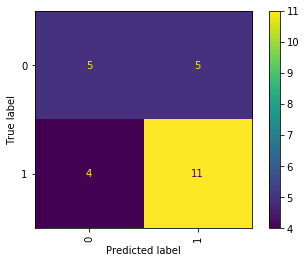

In [391]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, X_val2, y_val2, values_format='.0f', 
                      xticks_rotation='vertical');

# There were 11 players the model accurately predicted to meet/exceed adp rank,
# and there were 5 false positives that the model predicted to meet/exceed adp
# rank but did not.

# There were 5 players that the model accurately predicted to not meet/exceed
# adp rank, and there were 4 false negatives that the model predicted to
# not meet/exceed adp rank, but actually did.

## Classification Report

In [396]:
from sklearn.metrics import classification_report
print(classification_report(y_val2, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.69      0.73      0.71        15

    accuracy                           0.64        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.63      0.64      0.64        25



## ROC Curve

In [397]:
pipeline.predict_proba(X_val2)

array([[0.53470253, 0.46529747],
       [0.35205486, 0.64794514],
       [0.51073147, 0.48926853],
       [0.45714517, 0.54285483],
       [0.45367572, 0.54632428],
       [0.70852037, 0.29147963],
       [0.10526097, 0.89473903],
       [0.51823548, 0.48176452],
       [0.10339632, 0.89660368],
       [0.59851709, 0.40148291],
       [0.60182063, 0.39817937],
       [0.23589302, 0.76410698],
       [0.16656673, 0.83343327],
       [0.5309595 , 0.4690405 ],
       [0.49096748, 0.50903252],
       [0.28910439, 0.71089561],
       [0.38100967, 0.61899033],
       [0.19294992, 0.80705008],
       [0.57486284, 0.42513716],
       [0.23519678, 0.76480322],
       [0.27776991, 0.72223009],
       [0.5707556 , 0.4292444 ],
       [0.45845412, 0.54154588],
       [0.20410257, 0.79589743],
       [0.15689471, 0.84310529]])

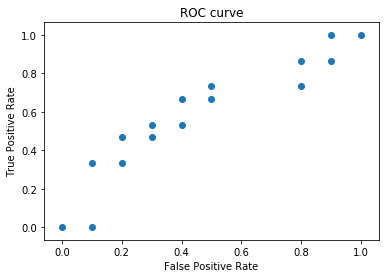

In [398]:
# Define predicted probabilities for target class
y_pred_prob = pipeline.predict_proba(X_val2)[:, 1]

# "The ROC curve is created by plotting the true positive rate (TPR) 
# against the false positive rate (FPR) 
# at various threshold settings."

# Use scikit-learn to calculate TPR & FPR at various thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val2, y_pred_prob)

# See the results on a plot. (ROC Curve)
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [399]:
# Use scikit-learn to calculate the area under the curve.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val2, y_pred_prob)

# ROC AUC score of 0.60 at least let's us know the model 
# is doing better than a baseline guess, which would be
# a score of 0.50.

0.6066666666666667

In [400]:
# Calculate ROC AUC score for test set
y_pred_prob_test = pipeline.predict_proba(X_test2)[:,1]
roc_auc_score(y_test2, y_pred_prob_test)

# Similar to the accuracy score, the ROC AUC for the test
# set was actually better than validation. Very important
# to note that the sample sizes for both val and test are still
# extremely small, but the model does appear to demonastrate
# some skill.

0.7897727272727273

## Try XG Boost

In [401]:
from xgboost import XGBClassifier

pipeline_XGB = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=1000, random_state=25, n_jobs=-1)
)

pipeline.fit(X_train2, y_train2)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Player', 'POS', 'YDS', 'YDS.1'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Player',
                                          'data_type': dtype('O'),
                                          'mapping': Deebo Samuel                  1
Dwayne Washington             2
Terry McLaurin                3
Mike Williams                 4
Preston Williams              5
Alex Erickson                 6
Justin Watson                 7
Brandon Zylstra               8
Rashaad Penny                 9
Ph...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=6,
                                        max_features='aut

In [402]:
y_pred_val = pipeline.predict(X_val2)
print(f'Validation Accuracy(XG Boost): {accuracy_score(y_val2, y_pred_val):%}')

# XG Boost appeared to have no impact, so will stick with previous
# iteration for now.

Validation Accuracy(XG Boost): 64.000000%


## PDP (Partial Dependence Plot) with 1 feature

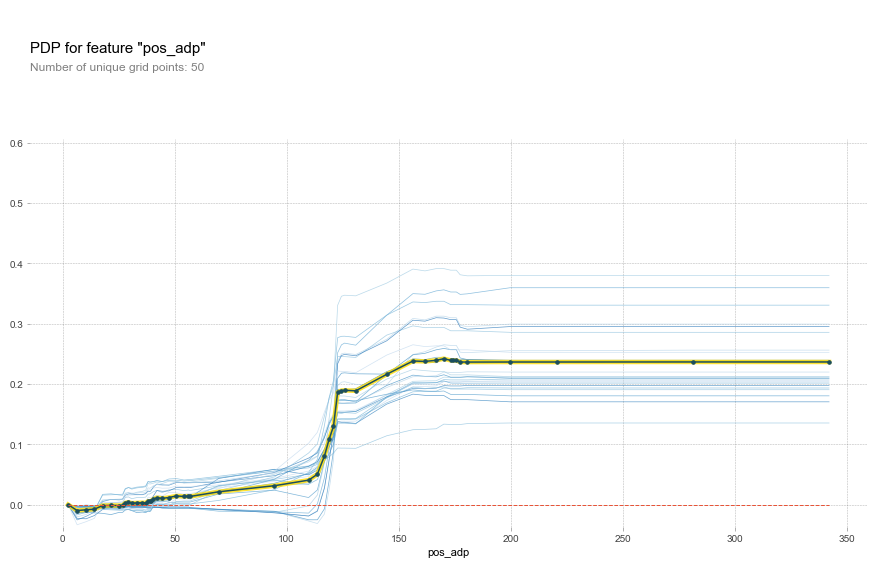

In [410]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feat = 'pos_adp'

isolated = pdp_isolate(
    model=pipeline,
    dataset=X_val2,
    model_features=X_val2.columns,
    feature=feat,
    num_grid_points=50
)

pdp_plot(isolated, feature_name=feat, plot_lines=True);

# Probability to meeting rank seems to shoot up beyond ADP of 100
# and flatline after ADP of 175. This makes sense to an extent
# because it is easier to "exceed" a low projection, and such 
# players would be found later in the draft. 

# More importantly, this plot illustrates that players taken toward
# the top of the draft have higher probabilities to fail to match/
# exceed their ADP rank. This could challenge the notion that 
# these early picks are "can't miss" players, but that could require 
# some deeper exploration.

## PDP with two features (interaction)

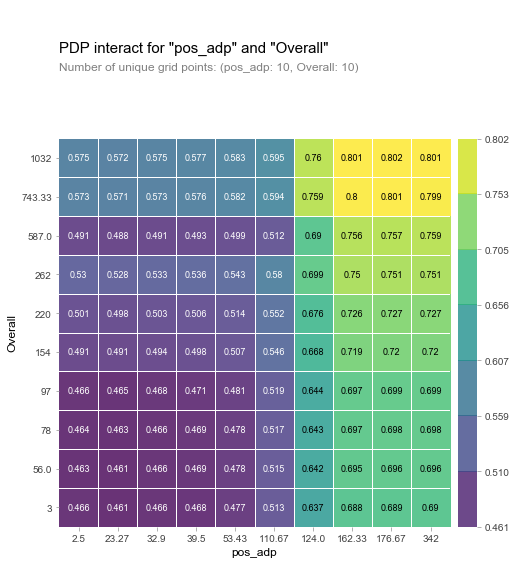

In [411]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

feats = ['pos_adp', 'Overall']

interaction = pdp_interact(
    model=pipeline,
    dataset=X_val2,
    model_features=X_val2.columns,
    features=feats
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=feats);

# This plot also demonstrates the low probabilities of exceeding/meeting
# ADP in the earlier rounds, so my take away is that getting those first
# few picks right is extremely important. And the measure of "right"
# should perhaps be more focused on floor, rather than ceiling.

## Look at Shap value

In [440]:
# Instantiate model and encoder outside of pipeline for 
# use with shap
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train2)
X_val_encoded = encoder.transform(X_val2)
X_test_encoded = encoder.transform(X_test2)
model = RandomForestClassifier(n_estimators=1000, random_state=25, n_jobs=-1,
                          max_depth=6, class_weight='balanced', min_samples_split=3)
# Fit on train, score on val
model.fit(X_train_encoded, y_train2)
y_pred_shap = model.predict(X_val_encoded)

In [441]:
# Get an individual observation to explain.

row = X_test_encoded.iloc[[-3]]
row

,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp
7,-1.0,-1.0,228.1,-1.0,9.5,53.5,-1.0,1.6,1.7,261.6,9.0,7.0


In [442]:
# What was the actual result for this player? (1 = met/exceeded adp .... 0 = failed
# to meet / exceed adp)
y_test2.iloc[[-3]]

7    0
Name: met_adp_rank, dtype: int64

In [443]:
# What does the model predict for this player?
model.predict(row)

array([0])

In [456]:
# Why did the model predict this?
# Look at a Shapley Values Force Plot

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=row
)

# Similar to the permutation importances, this plot demonstrates
# that the main thing the model uses is the positional adp, 
# projected touches (REC/ATT), Overall ADP and projected points.
# This makes me wonder about the relationship there ...

In [451]:
len(shap_values)

2

# NEXT STEP: ADD TEs

In [458]:
# Pull TE subset out of df

te_projs = df[df['POS'].str.contains('TE')]
print(te_projs.shape)
te_projs.head()

(119, 11)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS
11,Travis Kelce,KC,TE1,0.0,0.0,0.0,98.2,"1,236.1",9.5,0.6,277.8
22,George Kittle,SF,TE2,0.0,0.0,0.0,85.7,"1,180.3",6.6,0.3,242.7
30,Zach Ertz,PHI,TE3,0.0,0.0,0.0,90.5,956.0,6.9,0.5,226.7
57,Evan Engram,NYG,TE4,0.0,0.0,0.0,68.8,824.5,5.4,0.4,182.7
62,Jared Cook,NO,TE5,0.0,0.0,0.0,63.3,794.5,6.0,0.3,177.8


In [459]:
te_projs.isnull().sum().sort_values(ascending=False)

FPTS      0
FL        0
TDS.1     0
YDS.1     0
REC       0
TDS       0
YDS       0
ATT       0
POS       0
Team      0
Player    0
dtype: int64

In [460]:
len(te_projs[te_projs['FPTS']>0])

# So dropping players with 0 projected points will still retain
# majority of sample

110

In [461]:
te_projs = te_projs[te_projs['FPTS']>0]
print(te_projs.shape)
te_projs.head()

(110, 11)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS
11,Travis Kelce,KC,TE1,0.0,0.0,0.0,98.2,"1,236.1",9.5,0.6,277.8
22,George Kittle,SF,TE2,0.0,0.0,0.0,85.7,"1,180.3",6.6,0.3,242.7
30,Zach Ertz,PHI,TE3,0.0,0.0,0.0,90.5,956.0,6.9,0.5,226.7
57,Evan Engram,NYG,TE4,0.0,0.0,0.0,68.8,824.5,5.4,0.4,182.7
62,Jared Cook,NO,TE5,0.0,0.0,0.0,63.3,794.5,6.0,0.3,177.8


### BRING IN TE ADP DATA

In [462]:
te_adp = pd.read_csv('/Users/ekselan/Documents/GitHub/DS-Unit-2-Applied-Modeling/data/FF_Build/FP_FF_ADP_TE_2019.csv')
print(te_adp.shape)
te_adp.head()

(191, 12)


,TE,Overall,Player,Team,Bye,ESPN,MFL,FFC,RTSports,NFL,Fantrax,AVG
0,1.0,15.0,Travis Kelce,KC,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,27.0,Zach Ertz,PHI,10.0,3.0,2.0,3.0,3.0,2.0,2.0,2.5
2,3.0,26.0,George Kittle,SF,4.0,2.0,3.0,2.0,2.0,3.0,3.0,2.5
3,4.0,55.0,Evan Engram,NYG,11.0,4.0,5.0,5.0,5.0,4.0,4.0,4.5
4,5.0,56.0,O.J. Howard,TB,7.0,5.0,4.0,4.0,4.0,6.0,5.0,4.7


In [463]:
te_adp.isnull().sum()

TE            2
Overall       2
Player        2
Team          3
Bye          69
ESPN         66
MFL         156
FFC         174
RTSports    157
NFL         102
Fantrax     151
AVG          68
dtype: int64

In [464]:
# Tweak wrangle function and use with TEs

def adp_wrangle(X):
    X = X.copy()
    # Drop columns that are not needed
    X = X.drop(['TE','Team','Bye','ESPN','MFL','FFC','RTSports','NFL','Fantrax'], axis=1)
    # Rename AVG column for clarity and uniformity
    X = X.rename(columns={'AVG':'pos_adp'})
    return X

te_adp = adp_wrangle(te_adp)
print(te_adp.shape)
te_adp.head()

(191, 3)


,Overall,Player,pos_adp
0,15.0,Travis Kelce,1.0
1,27.0,Zach Ertz,2.5
2,26.0,George Kittle,2.5
3,55.0,Evan Engram,4.5
4,56.0,O.J. Howard,4.7


In [465]:
te_adp.isnull().sum()

Overall     2
Player      2
pos_adp    68
dtype: int64

In [467]:
te_adp[te_adp['pos_adp'].isnull()]

# I'll want to fill nan values for Walker and Reed

,Overall,Player,pos_adp
11,116.0,Delanie Walker,NaN
16,155.0,Jordan Reed,NaN
28,248.0,Benjamin Watson,NaN
35,303.0,Antonio Gates,NaN
37,359.0,Vernon Davis,NaN
38,361.0,Geoff Swaim,NaN
44,380.0,Anthony Fasano,NaN
45,399.0,Martellus Bennett,NaN
52,430.0,Michael Hoomanawanui,NaN
54,437.0,Brent Celek,NaN


### Fill TE ADP nans

In [468]:
# Dictionary to fill nans

i = {'pos_adp':11.7}

ii = {'pos_adp':16.8}

In [470]:
te_adp.loc[te_adp['Player'] == 'Delanie Walker'] = te_adp.loc[te_adp['Player'] == 'Delanie Walker'].fillna(i)
te_adp.loc[te_adp['Player'] == 'Jordan Reed'] = te_adp.loc[te_adp['Player'] == 'Jordan Reed'].fillna(ii)

len(te_adp[te_adp['pos_adp'].isnull()])

# Can now drop the nans

66

In [471]:
te_adp = te_adp.dropna()
print(te_adp.shape)
te_adp.head()

(125, 3)


,Overall,Player,pos_adp
0,15.0,Travis Kelce,1.0
1,27.0,Zach Ertz,2.5
2,26.0,George Kittle,2.5
3,55.0,Evan Engram,4.5
4,56.0,O.J. Howard,4.7


## MERGE PROJECTIONS WITH ADP DATA (TEs)

In [475]:
te_adp_projs = te_projs.merge(te_adp, on='Player', how='inner')
print(te_adp_projs.shape)
te_adp_projs.head()

(110, 13)


,Player,Team,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp
0,Travis Kelce,KC,TE1,0.0,0.0,0.0,98.2,"1,236.1",9.5,0.6,277.8,15.0,1.0
1,George Kittle,SF,TE2,0.0,0.0,0.0,85.7,"1,180.3",6.6,0.3,242.7,26.0,2.5
2,Zach Ertz,PHI,TE3,0.0,0.0,0.0,90.5,956.0,6.9,0.5,226.7,27.0,2.5
3,Evan Engram,NYG,TE4,0.0,0.0,0.0,68.8,824.5,5.4,0.4,182.7,55.0,4.5
4,Jared Cook,NO,TE5,0.0,0.0,0.0,63.3,794.5,6.0,0.3,177.8,69.0,6.8


In [477]:
te_adp_projs.isnull().sum()

Player     0
Team       0
POS        0
ATT        0
YDS        0
TDS        0
REC        0
YDS.1      0
TDS.1      0
FL         0
FPTS       0
Overall    0
pos_adp    0
dtype: int64

## BRING IN TE POINTS SCORED DATA

In [478]:
te_points = pd.read_csv('/Users/ekselan/Documents/GitHub/DS-Unit-2-Applied-Modeling/data/FF_Build/FP_FF_Points_Scored_TE_2019.csv')
print(te_points.shape)
te_points.head()

(156, 6)


,Rank,Player,Team,Points,Games,Avg
0,1.0,Travis Kelce,KC,254.3,16.0,15.9
1,2.0,George Kittle,SF,222.5,14.0,15.9
2,3.0,Darren Waller,LV,221.0,16.0,13.8
3,4.0,Zach Ertz,PHI,215.6,15.0,14.4
4,5.0,Mark Andrews,BAL,207.2,15.0,13.8


In [479]:
te_points.isnull().sum()
# These are rows of just nan values, can remove

Rank      2
Player    2
Team      2
Points    2
Games     2
Avg       2
dtype: int64

In [481]:
te_points = te_points.dropna()
print(te_points.shape)
te_points.head()

(154, 6)


,Rank,Player,Team,Points,Games,Avg
0,1.0,Travis Kelce,KC,254.3,16.0,15.9
1,2.0,George Kittle,SF,222.5,14.0,15.9
2,3.0,Darren Waller,LV,221.0,16.0,13.8
3,4.0,Zach Ertz,PHI,215.6,15.0,14.4
4,5.0,Mark Andrews,BAL,207.2,15.0,13.8


In [482]:
# Rename Rank column
te_points = te_points.rename(columns={'Rank':'pos_rank'})
te_points.head()

,pos_rank,Player,Team,Points,Games,Avg
0,1.0,Travis Kelce,KC,254.3,16.0,15.9
1,2.0,George Kittle,SF,222.5,14.0,15.9
2,3.0,Darren Waller,LV,221.0,16.0,13.8
3,4.0,Zach Ertz,PHI,215.6,15.0,14.4
4,5.0,Mark Andrews,BAL,207.2,15.0,13.8


## MERGE POINTS SCORED WITH PROJECTIONS/ADP DATA

In [497]:
# Perfect world, I would do outer merge and fill nan values with 
# dictionary on projections for Waller, Witten and Walker, but since 
# I am ultimately bringing this to the wr+rb data as opposed to applying 
# the model to TE data individually, it is not critical that I keep those observations

TEs = te_adp_projs.merge(te_points, on='Player', how='inner')
print(TEs.shape)
TEs.head()

(104, 18)


,Player,Team_x,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp,pos_rank,Team_y,Points,Games,Avg
0,Travis Kelce,KC,TE1,0.0,0.0,0.0,98.2,"1,236.1",9.5,0.6,277.8,15.0,1.0,1.0,KC,254.3,16.0,15.9
1,George Kittle,SF,TE2,0.0,0.0,0.0,85.7,"1,180.3",6.6,0.3,242.7,26.0,2.5,2.0,SF,222.5,14.0,15.9
2,Zach Ertz,PHI,TE3,0.0,0.0,0.0,90.5,956.0,6.9,0.5,226.7,27.0,2.5,4.0,PHI,215.6,15.0,14.4
3,Evan Engram,NYG,TE4,0.0,0.0,0.0,68.8,824.5,5.4,0.4,182.7,55.0,4.5,18.0,NYG,109.4,8.0,13.7
4,Jared Cook,NO,TE5,0.0,0.0,0.0,63.3,794.5,6.0,0.3,177.8,69.0,6.8,7.0,NO,167.5,14.0,12.0


In [498]:
TEs.isnull().sum()

Player      0
Team_x      0
POS         0
ATT         0
YDS         0
TDS         0
REC         0
YDS.1       0
TDS.1       0
FL          0
FPTS        0
Overall     0
pos_adp     0
pos_rank    0
Team_y      0
Points      0
Games       0
Avg         0
dtype: int64

In [499]:
# Use merged_Wrangle function to add target and remove Team columns

TEs = merged_wrangle(TEs)
print(TEs.shape)
TEs.head()

(104, 17)


,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,Overall,pos_adp,pos_rank,Points,Games,Avg,met_adp_rank
0,Travis Kelce,TE1,0.0,0.0,0.0,98.2,"1,236.1",9.5,0.6,277.8,15.0,1.0,1.0,254.3,16.0,15.9,1
1,George Kittle,TE2,0.0,0.0,0.0,85.7,"1,180.3",6.6,0.3,242.7,26.0,2.5,2.0,222.5,14.0,15.9,1
2,Zach Ertz,TE3,0.0,0.0,0.0,90.5,956.0,6.9,0.5,226.7,27.0,2.5,4.0,215.6,15.0,14.4,0
3,Evan Engram,TE4,0.0,0.0,0.0,68.8,824.5,5.4,0.4,182.7,55.0,4.5,18.0,109.4,8.0,13.7,0
4,Jared Cook,TE5,0.0,0.0,0.0,63.3,794.5,6.0,0.3,177.8,69.0,6.8,7.0,167.5,14.0,12.0,0


# MERGE TE DATA WITH RB+WR DATA

In [500]:
rbswrs.shape, TEs.shape

((268, 17), (104, 17))

In [501]:
rbswrs.head()

,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp,met_adp_rank
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0,0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5,1
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5,0
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0,1
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0,0


In [504]:
cols = TEs.columns.tolist()
flex = rbswrs.merge(TEs, on=cols, how='outer')
print(flex.shape)
flex.head()

(372, 17)


,Player,POS,ATT,YDS,TDS,REC,YDS.1,TDS.1,FL,FPTS,pos_rank,Points,Games,Avg,Overall,pos_adp,met_adp_rank
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0,0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5,1
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5,0
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0,1
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0,0


### Now that FLEX is set, can tweak column names

In [512]:
def flex_clean(x):
    x = x.copy()
    # Rename columns for clarity
    x = x.rename(columns={'YDS.1':'rcv_yds', 'TDS.1':'rcv_tds', 'Overall':'ovr_adp'})
    # Make column names lowercase for ease of use
    x.columns = x.columns.str.lower()
    return x

flex = flex_clean(flex)
print(flex.shape)
flex.head()

(372, 17)


,player,pos,att,yds,tds,rec,rcv_yds,rcv_tds,fl,fpts,pos_rank,points,games,avg,ovr_adp,pos_adp,met_adp_rank
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0,0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5,1
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5,0
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0,1
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0,0


# Apply model to Flex set

In [513]:
# Split into train and test sets
train3, test3 = train_test_split(flex, train_size=0.85, test_size=0.15,
                                    stratify=flex[target], random_state=25)
train3.shape, test3.shape

((316, 17), (56, 17))

In [514]:
# Split train into train and val sets
flex_train, val3 = train_test_split(train3, train_size=0.85, test_size=0.15,
                                   stratify=train3[target], random_state=25)
flex_train.shape, val3.shape, test3.shape

((268, 17), (48, 17), (56, 17))

In [517]:
# Define x feature matrices and y target vectors again

feats = ['player','pos','att','yds','tds','rec','rcv_yds','rcv_tds','fl','fpts',
        'ovr_adp','pos_adp']


X_train3 = flex_train[feats]
y_train3 = flex_train[target]
X_val3 = val3[feats]
y_val3 = val3[target]
X_test3 = test3[feats]
y_test3 = test3[target]

X_train3.shape, y_train3.shape, X_val3.shape, y_val3.shape, X_test3.shape, y_test3.shape

((268, 12), (268,), (48, 12), (48,), (56, 12), (56,))

In [523]:
# Apply pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=1000, random_state=25, n_jobs=-1,
                          max_depth=6, class_weight='balanced', min_samples_split=3)
)

# Fit on train, score on val
pipeline.fit(X_train3, y_train3)
y_pred_flex = pipeline.predict(X_val3)
print(f'Train Accuracy(Flex sample): {pipeline.score(X_train3, y_train3):%}')
print(f'Validation Accuracy(Flex sample): {accuracy_score(y_val3, y_pred_flex):%}')

Train Accuracy(Flex sample): 94.402985%
Validation Accuracy(Flex sample): 68.750000%


In [524]:
# Get test accuracy
y_pred_test3 = pipeline.predict(X_test3)
print(f'Test Accuracy(iteration V): {accuracy_score(y_test3, y_pred_test3):%}')

Test Accuracy(iteration V): 69.642857%


In [ ]:
'''
Have not tuned the model's parameters so using the same version
as what I applied to rbs+wrs resulted in a slightly lower Test Accuracy.
Since we are ultimately dealing with imbalanced classes, I'm a bit
more interested in the ROC score
'''

In [632]:
# Calculate ROC AUC score for val set
y_pred_prob_val = pipeline.predict_proba(X_val3)[:,1]
print(f'ROC score on val flex set: {roc_auc_score(y_val3, y_pred_prob_val):.2f}')

ROC score on val flex set: 0.66


In [526]:
# Calculate ROC AUC score for test set
y_pred_prob_test = pipeline.predict_proba(X_test3)[:,1]
print(f'ROC score on test flex set: {roc_auc_score(y_test3, y_pred_prob_test):.2f}')

# ROC score on flex set is a bit lower than rbswrs set, but an ROC of
# 0.75 allows me to still have confidence in the model's performance

ROC score on test flex set: 0.75


# LOGISTIC REGRESSION

In [534]:
from sklearn.linear_model import LogisticRegressionCV

linear = make_pipeline(
    ce.OrdinalEncoder(),
    LogisticRegressionCV(class_weight='auto', solver='lbfgs', 
                        cv=100, scoring='roc_auc', n_jobs=-1,
                        max_iter=100000, verbose=2)
)

# Fit on train, score on val
linear.fit(X_train3, y_train3)
y_pred_train = linear.predict(X_train3)
y_pred_flex = linear.predict(X_val3)
print(f'Train Accuracy(Logistic Regression): {accuracy_score(y_train3, y_pred_train):%}')
print(f'Validation Accuracy(Logistic Regression): {accuracy_score(y_val3, y_pred_flex):%}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s


Train Accuracy(Logistic Regression): 67.537313%
Validation Accuracy(Logistic Regression): 66.666667%


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


In [629]:
# Overall performance of the logistic regression appears worse,
# but it'll be more important to check ROC score, which I'll run on 
# the val set

y_pred_prob_lval = linear.predict_proba(X_val3)[:,1]
print(f'ROC score on val flex set(Logistic Regression): {roc_auc_score(y_val3, y_pred_prob_lval):.2f}')

ROC score on val flex set(Logistic Regression): 0.67


In [656]:
plt.style.use('fivethirtyeight')

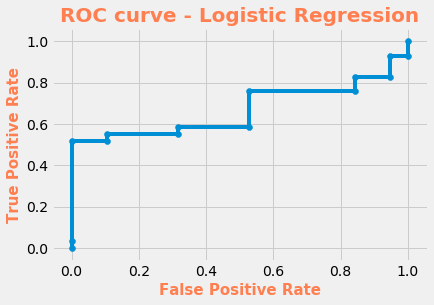

In [687]:
# Use scikit-learn to calculate TPR & FPR at various thresholds
fpr, tpr, thresholds = roc_curve(y_val3, y_pred_prob_lval)

# See the results on a plot. (ROC Curve)
plt.scatter(fpr, tpr)
plt.plot(fpr,tpr)
plt.title('ROC curve - Logistic Regression', fontsize=20, fontweight='bold', color='coral')
plt.xlabel('False Positive Rate', fontsize=15, fontweight='bold', color='coral')
plt.ylabel('True Positive Rate',fontsize=15, fontweight='bold', color='coral');

In [631]:
# Now for test set

y_pred_prob_ltest = linear.predict_proba(X_test3)[:,1]
print(f'ROC score on test flex set(Logistic Regression): {roc_auc_score(y_test3, y_pred_prob_ltest):.2f}')

ROC score on test flex set(Logistic Regression): 0.84


In [536]:
# Get test accuracy
y_pred_ltest = linear.predict(X_test3)
print(f'Test Accuracy(Logistic regression): {accuracy_score(y_test3, y_pred_ltest):%}')

Test Accuracy(Logistic regression): 71.428571%


In [ ]:
'''
So while the overall accuracy is not exciting, the ROC score
is excellent for logistic regression. 
'''

### Classification Report - Logistic Regression

In [537]:
print(classification_report(y_test3, y_pred_ltest))

              precision    recall  f1-score   support

           0       0.59      0.86      0.70        22
           1       0.88      0.62      0.72        34

    accuracy                           0.71        56
   macro avg       0.73      0.74      0.71        56
weighted avg       0.76      0.71      0.72        56



# CROSS VALIDATION ON RANDOMFOREST

In [546]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'randomforestclassifier__n_estimators': [int(x) for x in np.linspace(start=50, stop=400, num=10)], 
    'randomforestclassifier__max_depth': [int(x) for x in np.linspace(start=1, stop=20, num=2)], 
    'randomforestclassifier__max_features': ['auto','log2'],
    'randomforestclassifier__min_samples_split': [1.0,3,5,7,9,11,13,15,17],
    'randomforestclassifier__min_samples_leaf': [1,2,3]
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=500,
    cv=10,
    scoring='roc_auc',
    return_train_score=True,
    n_jobs=-1,
    random_state=25,
    verbose=3
)

search.fit(X_train3, y_train3);

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  7.0min finished


In [547]:
print('Best hyperparameters', search.best_params_)
print('\n')
print(f'Cross-validation Accuracy: {search.best_score_:%}')

Best hyperparameters {'randomforestclassifier__n_estimators': 166, 'randomforestclassifier__min_samples_split': 17, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 20}


Cross-validation Accuracy: 72.369318%


In [543]:
# Apply CV version of pipeline to val set
pipeline_cv = search.best_estimator_

y_pred_cv = pipeline_cv.predict(X_val3)
print(f'Validation Accuracy(CV): {accuracy_score(y_val3, y_pred_cv):%}')

Validation Accuracy(CV): 64.583333%


In [548]:
# Apply CV version to test set
y_pred_test_cv = pipeline_cv.predict(X_test3)
print(f'Test Accuracy(CV): {accuracy_score(y_test3, y_pred_test_cv):%}')

Test Accuracy(CV): 69.642857%


In [633]:
# Get ROC score on val set
y_pred_prob_val = pipeline_cv.predict_proba(X_val3)[:,1]
print(f'ROC score on val flex set (CV): {roc_auc_score(y_val3, y_pred_prob_val):.2f}')

ROC score on val flex set (CV): 0.67


In [549]:
# Get ROC score on test set
y_pred_prob_cvtest = pipeline_cv.predict_proba(X_test3)[:,1]
print(f'ROC score on test flex set (CV): {roc_auc_score(y_test3, y_pred_prob_cvtest):.2f}')

ROC score on test flex set (CV): 0.76


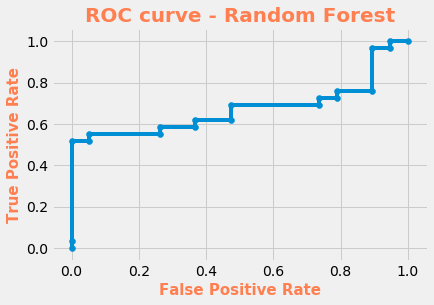

In [688]:
# Define predicted probabilities for target class
y_pred_prob_rfcv = pipeline_cv.predict_proba(X_val3)[:,1]

# Use scikit-learn to calculate TPR & FPR at various thresholds
fpr, tpr, thresholds = roc_curve(y_val3, y_pred_prob_rfcv)

# See the results on a plot. (ROC Curve)
plt.scatter(fpr, tpr)
plt.plot(fpr,tpr)
plt.title('ROC curve - Random Forest', fontsize=20, fontweight='bold', color='coral')
plt.xlabel('False Positive Rate', fontsize=15, fontweight='bold', color='coral')
plt.ylabel('True Positive Rate',fontsize=15, fontweight='bold', color='coral');

# LOGISTIC REGRESSION VS RANDOMFOREST - RESULTS

In [ ]:
'''
So this is interesting! Logistic regression actually yielded a 
better accuracy on val and test set, AND had a better ROC score
even after applying CV to the RandomForest. Looks like logistic
regression is the way to go for this data.
'''

In [553]:
print(f'RANDOMFOREST-CV CLASSIFICATION REPORT:\n\n {classification_report(y_test3, y_pred_test_cv)}')

RANDOMFOREST-CV CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.57      0.95      0.71        22
           1       0.95      0.53      0.68        34

    accuracy                           0.70        56
   macro avg       0.76      0.74      0.70        56
weighted avg       0.80      0.70      0.69        56



In [554]:
print(f'LOGISTICREGRESSION CLASSIFICATION REPORT:\n\n {classification_report(y_test3, y_pred_ltest)}')

LOGISTICREGRESSION CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.59      0.86      0.70        22
           1       0.88      0.62      0.72        34

    accuracy                           0.71        56
   macro avg       0.73      0.74      0.71        56
weighted avg       0.76      0.71      0.72        56



# LOGISTIC REGRESSION VISUALIZATIONS

### CONFUSION MATRIX

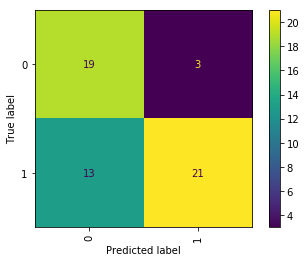

In [558]:
lr_cf = plot_confusion_matrix(linear, X_test3, y_test3, values_format='.0f', 
                      xticks_rotation='vertical');

lr_cf;

In [575]:
confusion = {
    'Predicted Negative':[19,13],
    'Predicted Positive':[3,21]
}

confusion = pd.DataFrame(confusion)
c = pd.Series(['True Negative','True Positive'])
confusion = confusion.set_index(c)
confusion

,Predicted Negative,Predicted Positive
True Negative,19,3
True Positive,13,21


### ROC Curve

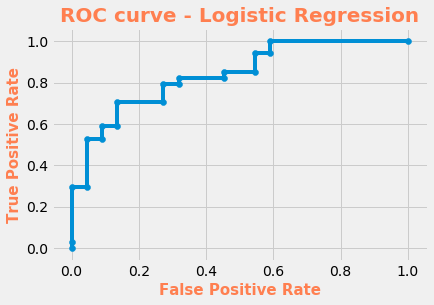

In [689]:
# Define predicted probabilities for target class
y_pred_prob_ltest = linear.predict_proba(X_test3)[:,1]

# Use scikit-learn to calculate TPR & FPR at various thresholds
fpr, tpr, thresholds = roc_curve(y_test3, y_pred_prob_ltest)

# See the results on a plot. (ROC Curve)
plt.scatter(fpr, tpr)
plt.plot(fpr,tpr)
plt.title('ROC curve - Logistic Regression', fontsize=20, fontweight='bold', color='coral')
plt.xlabel('False Positive Rate', fontsize=15, fontweight='bold', color='coral')
plt.ylabel('True Positive Rate',fontsize=15, fontweight='bold', color='coral');

### PARTIAL DEPENDENCE PLOT - ISOLATION (1 FEATURE)

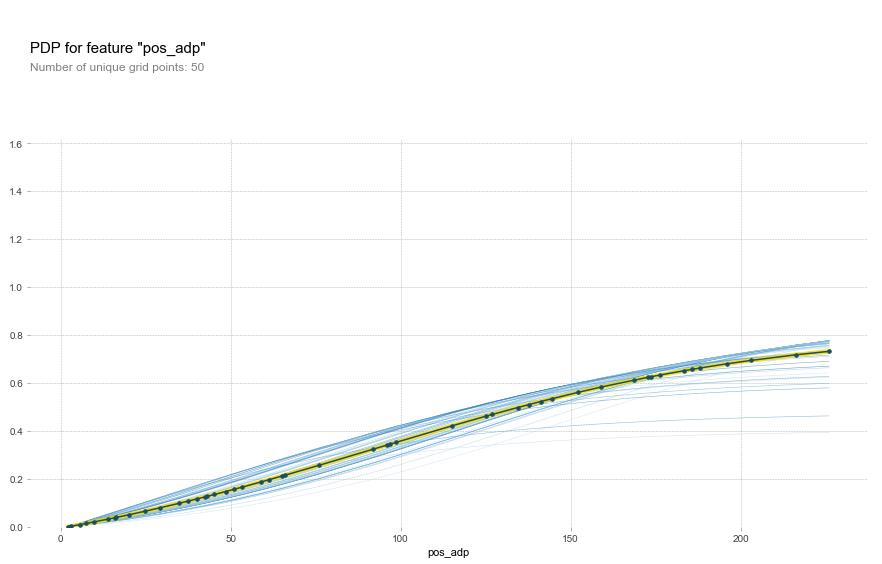

In [586]:
feat = 'pos_adp'

isolated = pdp_isolate(
    model=linear,
    dataset=X_test3,
    model_features=X_test3.columns,
    feature=feat,
    num_grid_points=50
)

pdp_plot(isolated, feature_name=feat, plot_lines=True);

# We can see here that as a player's positional ADP "rises,"
# their probability of meeting/exceeding their ADP rank increases.
# Reinforces the idea that players who exceed their ADP rank are
# scarce in the early rounds.

### PARTIAL DEPENDENCE PLOT - INTERACTION(2 FEATURES)

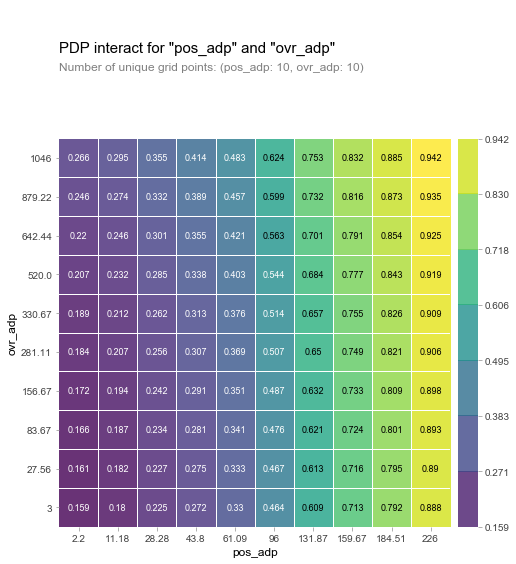

In [587]:
feats = ['pos_adp', 'ovr_adp']

interaction = pdp_interact(
    model=linear,
    dataset=X_test3,
    model_features=X_test3.columns,
    features=feats
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=feats);

# The linear model is a bit harsh on players at the top of the draft
# in terms of probability to meet/exceed ADP rank, but this still
# drives home the notion that getting those picks "right" is very 
# important, and perhaps more difficult than previously given credit for.

### PERMUTATION IMPORTANCES AND SHAP VALUES

In [589]:
# PERMUTATION IMPORTANCES - LOGISTIC REGRESSION

# Perform encoding, imputing and fit model outside of pipeline for use with eli5
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train3)
X_val_encoded = encoder.transform(X_val3)
X_test_encoded = encoder.transform(X_test3)

# imputer = SimpleImputer()
# X_train_imputed = imputer.fit_transform(X_train_encoded)
# X_val_imputed = imputer.transform(X_val_encoded)

model = LogisticRegressionCV(class_weight='auto', solver='lbfgs', 
                        cv=100, scoring='roc_auc', n_jobs=-1,
                        max_iter=100000, verbose=2)
model.fit(X_train_encoded, y_train3)

# Invoke and fit permuter
permuter = PermutationImportance(
    model,
    scoring='roc_auc',
    n_iter=3,
    random_state=25
)
permuter.fit(X_test_encoded, y_test3)

# Label permutation importances
cols = X_test3.columns.tolist()
X_test_encoded = pd.DataFrame(X_test_encoded, columns=cols)
feature_names = X_test_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

# Plot permutation importances
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished


Weight,Feature
0.3748 ± 0.1024,pos_adp
0.0178 ± 0.0112,att
0.0169 ± 0.0355,ovr_adp
0.0156 ± 0.0240,fpts
0.0116 ± 0.0176,rec
0.0045 ± 0.0083,rcv_yds
0.0004 ± 0.0013,rcv_tds
0 ± 0.0000,fl
0 ± 0.0000,tds
0 ± 0.0000,pos


In [596]:
# SHAP VALUES - LOGISTIC REGRESSION

# Get an individual observation to explain.
row = X_test_encoded.iloc[[0]]

import shap

explainer = shap.KernelExplainer(model.predict, X_test_encoded)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

# So as one might expect, the model is largely using a relationship
# between a player's positional ADP and their projected fantasy points.
# In combination with the permutation importances this also drives
# home the notion that opportunity is king, so projected touches
# is also a relevant factor

### "FANTASY RELEVANT" SUBSET SCATTER PLOT

In [598]:
flex.head()

,player,pos,att,yds,tds,rec,rcv_yds,rcv_tds,fl,fpts,pos_rank,points,games,avg,ovr_adp,pos_adp,met_adp_rank
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0,0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5,1
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5,0
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0,1
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0,0


In [603]:
# Create subset of flex set to include players drafted in early rounds
# (top 5-6 rounds)
fr = flex[flex['ovr_adp']<=60]
print(fr.shape)
fr.head()

(55, 17)


,player,pos,att,yds,tds,rec,rcv_yds,rcv_tds,fl,fpts,pos_rank,points,games,avg,ovr_adp,pos_adp,met_adp_rank
0,Saquon Barkley,RB1,269.0,"1,253.7",9.6,87.6,705.5,3.4,1.5,358.6,10.0,244.1,13.0,18.8,1.0,1.0,0
1,Christian McCaffrey,RB2,215.8,"1,044.8",6.7,97.2,824.3,5.1,1.8,351.6,1.0,471.2,16.0,29.5,2.0,2.5,1
2,Alvin Kamara,RB3,194.7,913.8,9.6,87.4,771.3,4.6,1.5,338.3,9.0,248.5,14.0,17.8,3.0,2.5,0
3,Ezekiel Elliott,RB4,294.3,"1,295.2",8.9,67.0,515.7,2.6,2.2,312.5,3.0,311.7,16.0,19.5,4.0,4.0,1
4,Le'Veon Bell,RB5,257.1,"1,106.4",7.6,64.0,514.9,2.6,1.8,284.1,16.0,215.0,15.0,14.3,7.0,6.0,0


In [621]:
fig = px.scatter(flex, x='ovr_adp', y='fpts', color=target)
fig.update_layout(title_text='FLEX: All')
fig.show()

In [610]:
print(f'Percentage of players in FLEX set that met/exceeded ADP rank: {flex[target].value_counts(normalize=True)[1]:%}')

Percentage of players in FLEX set that met/exceeded ADP rank: 59.946237%


In [ ]:
'''
In the FLEX set, we know that players exceed ADP rank the majority of the time,
so if we simply guessed that a player would meet/exceed their ADP rank, we'd be 
accurate 60% of the time. This could suggest that we don't need to worry much about
whether players woud do well, but honing in on those early rounds tells
a different story
'''

In [622]:
fig = px.scatter(fr, x='ovr_adp', y='fpts', color=target)
fig.update_layout(title_text='FLEX: Early Rounds(1 - 7)')
fig.show()

In [611]:
print(f'Percentage of players in FLEX subset (early rounds) that met/exceeded ADP rank: {fr[target].value_counts(normalize=True)[1]:%}')

Percentage of players in FLEX subset (early rounds) that met/exceeded ADP rank: 43.636364%


In [ ]:
'''
We can see here that the percentage of early round picks that meet/exceed their ADP
rank is much lower than the overall sample, so based on 2019 data, it's more
difficult to make a "good" pick early in the draft and perhaps more important to
get it right. This is difficult considering how little info we have before 
each season, but perhaps machine learning can help us fill those gaps
and win more fantasy football games!
'''

In [650]:
submission = X_test3.copy()

In [653]:
submission['predictions'] = y_pred_ltest
submission['true_status'] = y_test3
submission

,player,pos,att,yds,tds,rec,rcv_yds,rcv_tds,fl,fpts,ovr_adp,pos_adp,predictions,true_status
95,Andy Janovich,RB104,2.6,9.4,0.1,5.3,38.9,0.3,0.0,12.3,529.0,98.0,0,0
235,Riley Ridley,WR122,0.0,0.0,0.0,8.6,103.8,0.6,0.0,22.3,314.0,96.0,0,0
219,Phillip Dorsett,WR100,1.1,7.0,0.0,17.2,230.7,1.6,0.1,50.3,250.0,99.0,0,1
18,James White,RB19,67.2,285.7,2.5,71.1,629.6,4.1,0.5,201.2,52.0,24.5,0,1
356,Eric Saubert,TE95,0.0,0.0,0.0,4.8,43.3,0.5,0.0,12.0,667.0,91.0,0,0
152,Sterling Shepard,WR33,2.1,12.5,0.0,63.5,839.6,4.9,0.2,177.7,86.0,35.2,0,0
363,Matt Lengel,TE102,0.0,0.0,0.0,3.7,36.8,0.2,0.0,8.6,970.0,173.0,1,1
330,Luke Willson,TE67,0.0,0.0,0.0,10.6,82.5,0.7,0.2,22.7,616.0,75.0,0,0
310,Dawson Knox,TE43,0.0,0.0,0.0,16.0,193.0,1.0,0.2,41.1,1046.0,183.0,1,1
322,Xavier Grimble,TE55,0.0,0.0,0.0,11.5,134.2,1.0,0.1,30.7,461.0,48.0,0,0
